# K-Nearest Neighbors

![wilson](img/wilson.jpg)

KNearest Neighbors is our second classification algorithm in our toolbelt added to our logistic regression classifier.

If we remember, logistic regression is a supervised, parametric, discriminative model.

KNN is a supervised, non-parametric, discriminative, lazy-learning algorithm.


In [1]:
mccalister = ['Adam', 'Amanda','Chum', 'Dann',
 'Jacob', 'Jason', 'Johnhoy', 'Karim',
'Leana','Luluva', 'Matt', 'Maximilian', ]

In [2]:
# This is always a good idea
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.student_caller import one_random_student

## Let's load in our trusty Titanic dataset

![titanic](https://media.giphy.com/media/uhB0n3Eac8ybe/giphy.gif)

In [4]:
titanic = pd.read_csv('data/cleaned_titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,False,1,0,1
1,2,1,1,38.0,1,0,71.2833,False,0,0,0
2,3,1,3,26.0,0,0,7.9250,False,0,0,1
3,4,1,1,35.0,1,0,53.1000,False,0,0,1
4,5,0,3,35.0,0,0,8.0500,False,1,0,1


#### For visualization purposes, we will use only two features for our first model

In [5]:
X = titanic[['Age', 'Fare']]
y = titanic['Survived']
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

Titanic is a binary classification problem, with our target being the Survived feature

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = .25)

#### Then perform another tts, and put aside the test set from above until the end

We will hold of from KFold or crossval for now, so that our notebook is more comprehensible.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = .25)

#### Then perform another tts, and put aside the test set from above until the end

We will hold of from KFold or crossval for now, so that our notebook is more comprehensible.

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=42, test_size = .25)

training accuracy: 0.7477477477477478
Val accuracy: 0.4431137724550898
Confusion Matrix, without normalization
[[ 9 92]
 [ 1 65]]


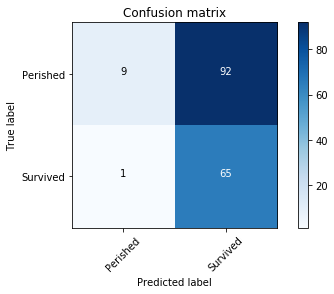

In [177]:
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score
from src.confusion import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier()

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

knn.fit(X_train, y_train)
print(f"training accuracy: {knn.score(X_train, y_train)}")
print(f"Val accuracy: {knn.score(X_val, y_val)}")

y_hat = knn.predict(X_val)

plot_confusion_matrix(confusion_matrix(y_val, y_hat), classes=['Perished', 'Survived'])

# Quick review of confusion matrix and our metrics: 
  

In [10]:
question = 'How many true positives?'
one_random_student(mccalister, question)


Jacob
How many true positives?


In [11]:
question = 'How many true negatives?'
one_random_student(mccalister, question)


Dann
How many true negatives?


In [12]:
question = 'How many false positives?'
one_random_student(mccalister, question)

Matt
How many false positives?


In [13]:
question = 'How many  how many false negatives?'
one_random_student(mccalister, question)

Karim
How many  how many false negatives?


In [14]:
question = 'Which will be higher: precision or recall'
one_random_student(mccalister, question)

Chum
Which will be higher: precision or recall


# KNN: Under the Hood

For visualization purposes, let's pull out a small subset of our training data, and create a model using only two dimensions: Age and Fare.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = .25)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=42, test_size = .25)

Text(0.5, 1.0, 'Subsample of Training Data')

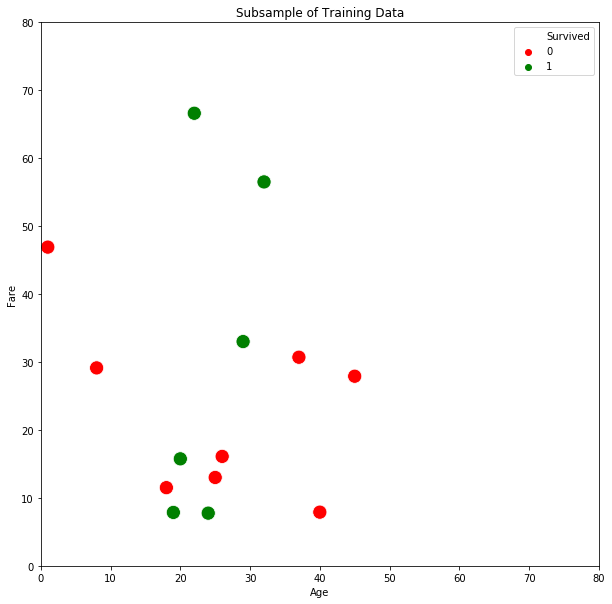

In [17]:
import seaborn as sns

X_for_viz = X_train.sample(15, random_state=40)
y_for_viz = y_train[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(X_for_viz['Age'], X_for_viz['Fare'], 
                hue=y_for_viz, palette={0:'red', 1:'green'}, 
                s=200, ax=ax)

ax.set_xlim(0,80)
ax.set_ylim(0,80)
plt.legend()
plt.title('Subsample of Training Data')

The KNN algorithm works by simply storing the training set in memory, then measuring the distance from the training points to a a new point.

Let's drop a point from our validation set into the plot above.

(0, 100)

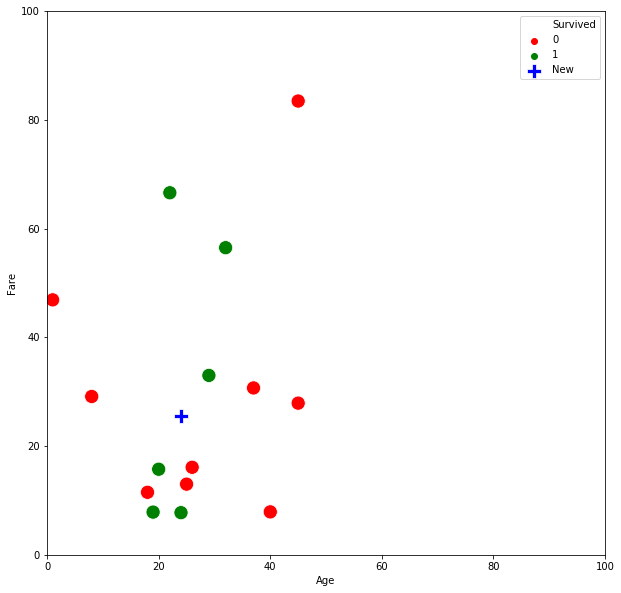

In [18]:
X_for_viz = X_train.sample(15, random_state=40)
y_for_viz = y_train[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(X_for_viz['Age'], X_for_viz['Fare'], hue=y_for_viz, palette={0:'red', 1:'green'}, s=200, ax=ax)

plt.legend()

#################^^^Old code^^^##############
####################New code#################

# Let's take one sample from our validation set and plot it
new_x = pd.DataFrame(X_val.loc[484]).T
new_y = y_val[new_x.index]

sns.scatterplot(new_x['Age'], new_x['Fare'], color='blue', s=200, ax=ax, label='New', marker='P')

ax.set_xlim(0,100)
ax.set_ylim(0,100)

In [19]:
new_x.head()

,Age,Fare
484,24.0,25.4667


Then, KNN finds the K nearest points. K corresponds to the n_neighbors parameter defined when we instantiate the classifier object.

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

Let's fit our training data, then predict what our validation point will be based on the closest 1 neighbor.

# Chat poll: What will our 1 neighbor KNN classifier predict our new point to be?



In [21]:
knn.fit(X_for_viz, y_for_viz)
knn.predict(new_x)

array([1])

When we raise the value of K, KNN acts democratically.  It finds the K closest points, and takes a vote based on the labels.

Let's raise K to 3.

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)

# Chat poll: What will our 3 neighbor KNN classifier predict our new point to be?


In [23]:
knn.fit(X_for_viz, y_for_viz)
knn.predict(new_x)

array([1])

It is a bit harder to tell what which points are closest by eye.

Let's update our plot to add indexes.

      Age     Fare
484  24.0  25.4667


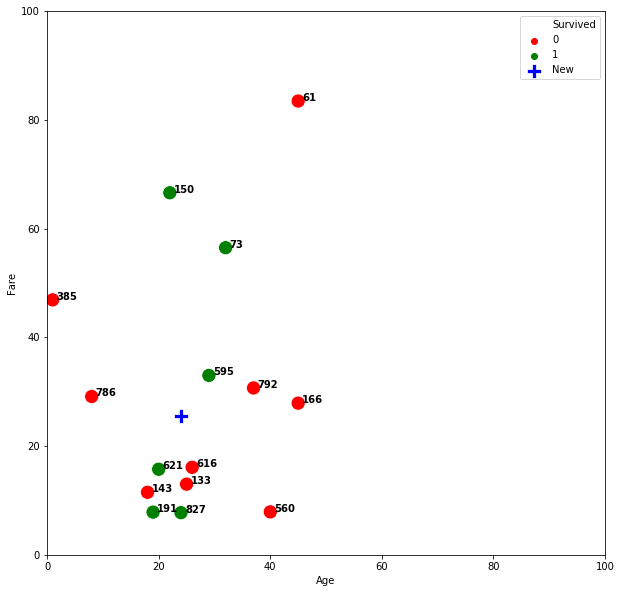

In [24]:
X_for_viz = X_train.sample(15, random_state=40)
y_for_viz = y_train[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(X_for_viz['Age'], X_for_viz['Fare'], hue=y_for_viz, 
                palette={0:'red', 1:'green'}, s=200, ax=ax)


# Now let's take another sample

# new_x = X_val.sample(1, random_state=33)
new_x = pd.DataFrame(X_val.loc[484]).T
new_x.columns = ['Age','Fare']
new_y = y_val[new_x.index]

print(new_x)
sns.scatterplot(new_x['Age'], new_x['Fare'], color='blue', s=200, ax=ax, label='New', marker='P')
ax.set_xlim(0,100)
ax.set_ylim(0,100)
plt.legend()

#################^^^Old code^^^##############
####################New code#################

# add annotations one by one with a loop
for index in X_for_viz.index:
    ax.text(X_for_viz.Age[index]+0.7, X_for_viz.Fare[index], s=index, horizontalalignment='left', size='medium', color='black', weight='semibold')
 



We can the sklearn NearestNeighors object to see the exact calculations.

In [25]:
from sklearn.neighbors import NearestNeighbors

df_for_viz = pd.merge(X_for_viz, y_for_viz, left_index=True, right_index=True)
neighbor = NearestNeighbors(3)
neighbor.fit(X_for_viz)
nearest = neighbor.kneighbors(new_x)

nearest

(array([[ 9.04160433,  9.5778426 , 10.51549452]]), array([[11,  5,  0]]))

In [26]:
df_for_viz.iloc[nearest[1][0]]

,Age,Fare,Survived
595,29.0,33.0000,1
616,26.0,16.1000,0
621,20.0,15.7417,1


In [27]:
new_x

,Age,Fare
484,24.0,25.4667


# Chat poll: What will our 5 neighbor KNN classifier predict our new point to be?

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_for_viz, y_for_viz)
knn.predict(new_x)

array([0])

Let's iterate through K, 1 through 10, and see the predictions.

In [29]:
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_for_viz, y_for_viz)
    print(knn.predict(new_x))


[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]


What K was correct?

In [30]:
new_y

484    0
Name: Survived, dtype: int64

# Different types of distance

How did the algo calculate those distances? 

In [31]:
nearest

(array([[ 9.04160433,  9.5778426 , 10.51549452]]), array([[11,  5,  0]]))

### Euclidean Distance

**Euclidean distance** refers to the distance between two points. These points can be in different dimensional space and are represented by different forms of coordinates. In one-dimensional space, the points are just on a straight number line.


### Measuring distance in a 2-d Space

In two-dimensional space, the coordinates are given as points on the x- and y-axes

![alt text](img/euclidean_2d.png)
### Measuring distance in a 3-d Space

In three-dimensional space, x-, y- and z-axes are used. 

$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 +  (z_1-z_2)^2}$$
![alt text](img/vectorgraph.jpg)

In [32]:
# Let's reproduce those numbers:
nearest

(array([[ 9.04160433,  9.5778426 , 10.51549452]]), array([[11,  5,  0]]))

In [33]:
df_for_viz.iloc[11]


Age         29.0
Fare        33.0
Survived     1.0
Name: 595, dtype: float64

In [34]:
new_x

,Age,Fare
484,24.0,25.4667


In [35]:
def euclid(train_X, val_X):
    """
    :param train_X: one record from the training set
                    (type series or dataframe including target (survived))
    :param val_X: one record from the validation set
                    series or dataframe include target (survived)
    :return: The euclidean distance between train_X and val_X
    """
    diff = train_X - val_X

    # Remove survived column
    diff = diff.iloc[:, :-1]

    dist = np.sqrt((diff ** 2).sum(axis=1))

    return dist

    

In [36]:
euclid(df_for_viz.iloc[11], new_x)

484    9.041604
dtype: float64

In [37]:
euclid(df_for_viz.iloc[5], new_x)

484    9.577843
dtype: float64

In [38]:
euclid(df_for_viz.iloc[0], new_x)

484    10.515495
dtype: float64

# Manhattan distance

Manhattan distance is the distance measured if you walked along a city block instead of a straight line. 

> if 𝑥=(𝑎,𝑏) and 𝑦=(𝑐,𝑑),  
> Manhattan distance = |𝑎−𝑐|+|𝑏−𝑑|

![](img/manhattan.png)

# Pairs: 

Write an function that calculates Manhattan distance between two points

Calculate the distance between new_X and the 15 training points.

Based on 5 K, determine what decision a KNN algorithm would make if it used Manhattan distance.




In [39]:
# your code here


In [41]:
manh_diffs = []
for index in df_for_viz.index:
    manh_diffs.append(manhattan(df_for_viz,index, new_x))
    
sorted(manh_diffs)

[(11.366699999999998, 616, 0.0),
 (12.5333, 595, 1.0),
 (13.4667, 133, 0.0),
 (13.725, 621, 1.0),
 (17.7167, 827, 1.0),
 (18.2291, 792, 0.0),
 (19.6583, 786, 0.0),
 (19.9667, 143, 0.0),
 (22.6125, 191, 1.0),
 (23.4333, 166, 0.0),
 (33.570899999999995, 560, 0.0),
 (39.0291, 73, 1.0),
 (43.13329999999999, 150, 1.0),
 (44.4333, 385, 0.0),
 (79.00829999999999, 61, 0.0)]

In [42]:
from sklearn.neighbors import NearestNeighbors

neighbor = NearestNeighbors(10, p=1)
neighbor.fit(X_for_viz)
nearest = neighbor.kneighbors(new_x)

nearest

(array([[11.3667, 12.5333, 13.4667, 13.725 , 17.7167, 18.2291, 19.6583,
         19.9667, 22.6125, 23.4333]]),
 array([[ 5, 11,  9,  0, 10,  4,  3,  6, 12, 14]]))

In [43]:
df_for_viz.iloc[nearest[1][0]]

,Age,Fare,Survived
616,26.0,16.1000,0
595,29.0,33.0000,1
133,25.0,13.0000,0
621,20.0,15.7417,1
827,24.0,7.7500,1
792,37.0,30.6958,0
786,8.0,29.1250,0
143,18.0,11.5000,0
191,19.0,7.8542,1
166,45.0,27.9000,0


      Age     Fare
484  24.0  25.4667


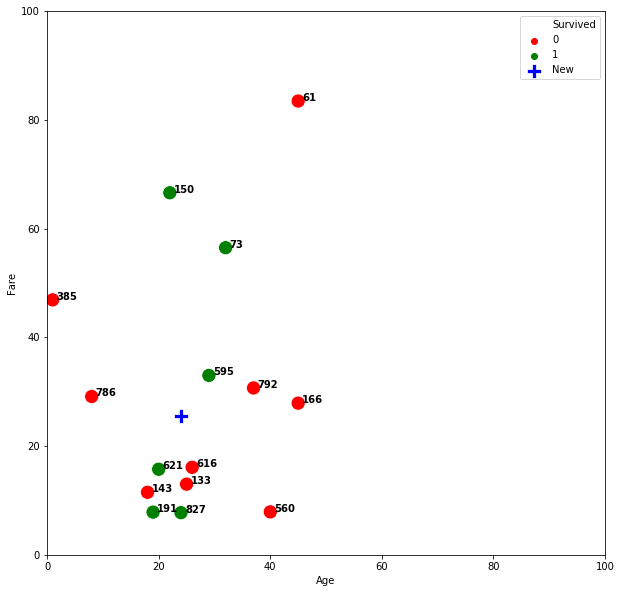

In [44]:
from src.plot_train import plot_train
plot_train(X_train, y_train, X_val, y_val)

If we change the distance metric, our prediction should change for K = 5.

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_euc = KNeighborsClassifier(5, p=2)
knn_euc.fit(X_for_viz, y_for_viz)
knn_euc.predict(new_x)

array([0])

In [46]:
knn_man = KNeighborsClassifier(5, p=1)
knn_man.fit(X_for_viz, y_for_viz)
knn_man.predict(new_x)

array([1])

In [47]:
# Which got it right? 
new_y

484    0
Name: Survived, dtype: int64

# Scaling

You may have suspected that we were leaving something out. For any distance based algorithms, scaling is very important.  Look at how the shape of array changes before and after scaling.

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = .25)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=42, test_size = .25)

knn = KNeighborsClassifier()

ss = StandardScaler()
X_ind = X_train.index
X_col = X_train.columns

X_train_s = pd.DataFrame(ss.fit_transform(X_train))
X_train_s.index = X_ind
X_train_s.columns = X_col

X_v_ind = X_val.index
X_val_s = pd.DataFrame(ss.transform(X_val))
X_val_s.index = X_v_ind
X_val_s.columns = X_col

knn.fit(X_train_s, y_train)
print(f"training accuracy: {knn.score(X_train_s, y_train)}")
print(f"Val accuracy: {knn.score(X_val_s, y_val)}")

y_hat = knn.predict(X_val_s)



training accuracy: 0.717434869739479
Val accuracy: 0.6467065868263473


      Age     Fare
484  24.0  25.4667
        Age      Fare
484 -0.4055 -0.154222


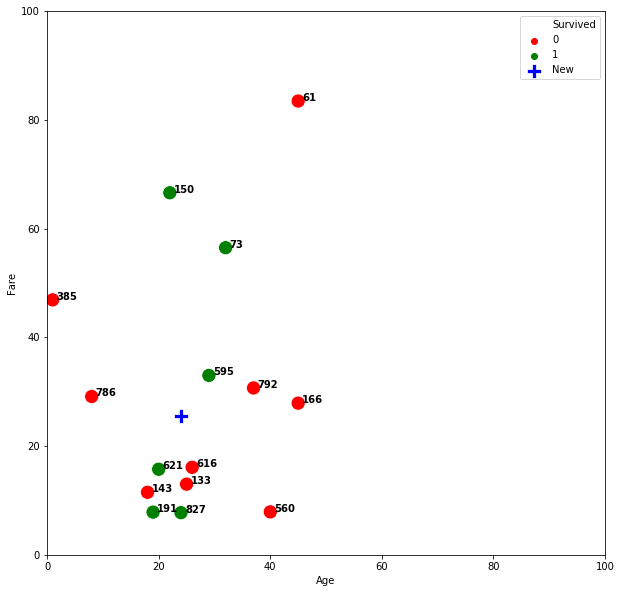

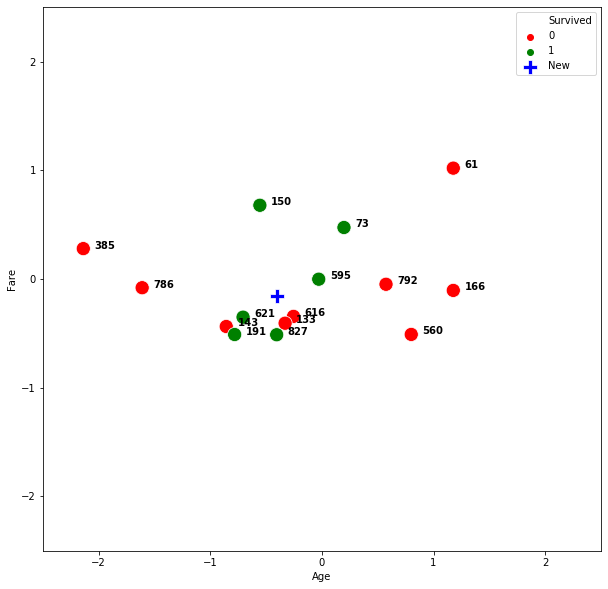

In [49]:
plot_train(X_train, y_train, X_val, y_val)
plot_train(X_train_s, y_train, X_val_s, y_val, -2.5,2.5, text_pos=.1 )

Look at how much that changes things.

Look at 166 to 150.  
Look at the group 621, 143,192

Now let's run our classifier on scaled data and compare to unscaled.

In [50]:
from src.k_classify import predict_one

titanic = pd.read_csv('data/cleaned_titanic.csv')
X = titanic[['Age', 'Fare']]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = .25)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=42, test_size = .25)

predict_one(X_train, X_val, y_train, y_val)

[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [51]:
ss = StandardScaler()

X_train_s = pd.DataFrame(ss.fit_transform(X_train))
X_train_s.index = X_train.index
X_train_s.columns = X_train.columns

X_val_s = pd.DataFrame(ss.transform(X_val))
X_val_s.index = X_val.index
X_val_s.columns = X_val.columns


predict_one(X_train_s, X_val_s, y_train, y_val)

[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]


## Should we use a Standard Scaler or Min-Max Scaler?  
https://sebastianraschka.com/Articles/2014_about_feature_scaling.html   
http://datareality.blogspot.com/2016/11/scaling-normalizing-standardizing-which.html

# Let's unpack: KNN is a supervised, non-parametric, descriminative, lazy-learning algorithm

## Supervised
You should be very comfortable with the idea of supervised learning by now.  Supervised learning involves labels.  KNN needs labels for the voting process.



# Non-parametric

Let's look at the fit KNN classifier.

In [54]:
knn = KNeighborsClassifier()
knn.__dict__

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

In [56]:
knn.fit(X_train_s, y_train)
knn.__dict__

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform',
 'outputs_2d_': False,
 'classes_': array([0, 1]),
 '_y': array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 0

What do you notice? No coefficients! In linear and logistic regression, fitting the model involves calculation of parameters associated with a best fit hyperplane.

KNN does not use such a process.  It simply calculates the distance from each point, and votes.

# Descriminative

### Example training data

This example uses a multi-class problem and each color represents a different class. 


### KNN classification map (K=1)

![1NN classification map](img/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](img/04_5nn_map.png)

## What are those white spaces?

Those are spaces where ties occur.  

How can we deal with ties?  
  - for binary classes  
      - choose an odd number for k
        
  - for multiclass  
      - Reduce the K by 1 to see who wins.  
      - Weight the votes based on the distance of the neighbors  

# Lazy-Learning
![lazy](https://media.giphy.com/media/QSzIZKD16bNeM/giphy.gif)

Lazy-learning has also to do with KNN's training, or better yet, lack of a training step.  Whereas models like linear and logistic fit onto training data, doing the hard work of calculating paramaters when .fit is called, the training phase of KNN is simply storing the training data in memory.  The training step of KNN takes no time at all. All the work is done in the prediction phase, where the distances are calculated. Prediction is therefore memory intensive, and can take a long time.    KNN is lazy because it puts off the work until a later time than most algos.


# Pair 

Use the timeit function to compare the time of fitting and predicting in Logistic vs KNN

Time it example

In [99]:
%%timeit
import nltk 
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

newlist = []
for word in emma:
    newlist.append(word.upper())


152 ms ± 3.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [97]:
%timeit newlist = [s.upper() for s in emma]

133 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [96]:
%timeit newlist = map(str.upper, emma)

368 ns ± 10.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [100]:
# Your code here

# Tuning K

In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score
 

In [165]:
from sklearn.model_selection import train_test_split, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)
# Set test set aside until we are confident in our model

In [166]:
kf = KFold(n_splits=5)

k_scores_train = {}
k_scores_val = {}


for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_score_t = []
    accuracy_score_v = []
    for train_ind, val_ind in kf.split(X_train, y_train):
        
        X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind] 
        X_v, y_v = X_train.iloc[val_ind], y_train.iloc[val_ind]
        mm = MinMaxScaler()
        
        X_t_ind = X_t.index
        X_v_ind = X_v.index
        
        X_t = pd.DataFrame(mm.fit_transform(X_t))
        X_t.index = X_t_ind
        X_v = pd.DataFrame(mm.transform(X_v))
        X_v.index = X_v_ind
        
        knn.fit(X_t, y_t)
        
        y_pred_t = knn.predict(X_t)
        y_pred_v = knn.predict(X_v)
        
        accuracy_score_t.append(accuracy_score(y_t, y_pred_t))
        accuracy_score_v.append(accuracy_score(y_v, y_pred_v))
        
        
    k_scores_train[k] = np.mean(accuracy_score_t)
    k_scores_val[k] = np.mean(accuracy_score_v)

In [167]:
k_scores_train

{1: 0.9527049330643681,
 2: 0.7991818194642328,
 3: 0.786796258940033,
 4: 0.7440004796230727,
 5: 0.7391153775621041,
 6: 0.7181008336977528,
 7: 0.7135951981266487,
 8: 0.7060876863829367,
 9: 0.7038299313010482,
 10: 0.7019579906614567,
 11: 0.7023381624793691,
 12: 0.7023395731354654,
 13: 0.6982049401176488,
 14: 0.6982063507737448,
 15: 0.7019636332858412,
 16: 0.6940759497242168,
 17: 0.6970771205687767,
 18: 0.6944497735896966,
 19: 0.6967018860472005}

In [168]:
k_scores_val

{1: 0.6262035686230502,
 2: 0.6352485691841544,
 3: 0.6066883626977893,
 4: 0.6502749410840535,
 5: 0.6472225339468073,
 6: 0.6532936819661093,
 7: 0.6412411626080126,
 8: 0.6577712939064078,
 9: 0.6712939064078105,
 10: 0.6712939064078105,
 11: 0.6577937380765346,
 12: 0.6727976658063068,
 13: 0.660823701043654,
 14: 0.6668050723824487,
 15: 0.6547862192795422,
 16: 0.6607900347884638,
 17: 0.6517450342273594,
 18: 0.6547749971944787,
 19: 0.656278756592975}

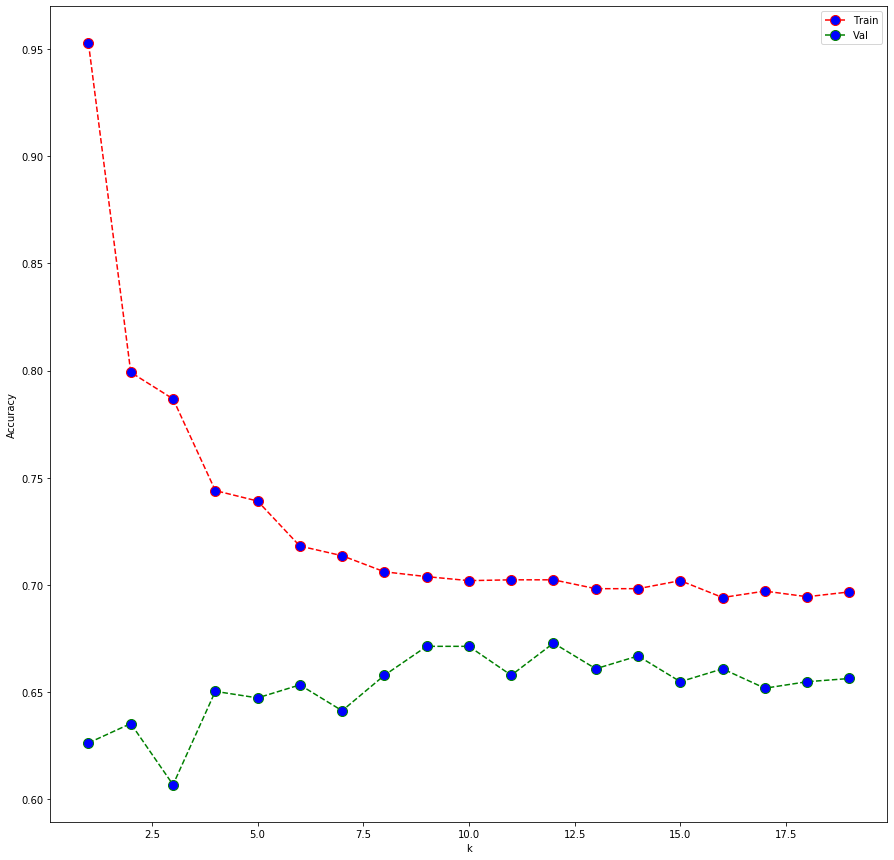

In [169]:
fig, ax = plt.subplots(figsize=(15,15))

ax.plot(list(k_scores_train.keys()), list(k_scores_train.values()),color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Train')
ax.plot(list(k_scores_val.keys()), list(k_scores_val.values()), color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Val')
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
plt.legend()

### What value of K performs best on our Test data?

### How do you think K size relates to our concepts of bias and variance?

![alt text](img/K-NN_Neighborhood_Size_print.png)

training accuracy: 0.7132132132132132
Test accuracy: 0.6502242152466368
Confusion Matrix, without normalization
[[88 53]
 [25 57]]


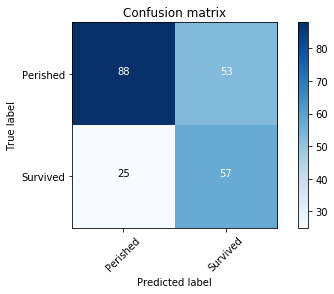

In [171]:
mm = MinMaxScaler()

X_train_ind = X_train.index
X_train = pd.DataFrame(mm.fit_transform(X_train))
X_train.index = X_train_ind

X_test_ind = X_test.index
X_test =  pd.DataFrame(mm.transform(X_test))
X_test.index = X_test_ind


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)



print(f"training accuracy: {knn.score(X_train, y_train)}")
print(f"Test accuracy: {knn.score(X_test, y_test)}")

y_hat = knn.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_hat), classes=['Perished', 'Survived'])

In [172]:
recall_score(y_test, y_hat)

0.6951219512195121

In [173]:
precision_score(y_test, y_hat)

0.5181818181818182